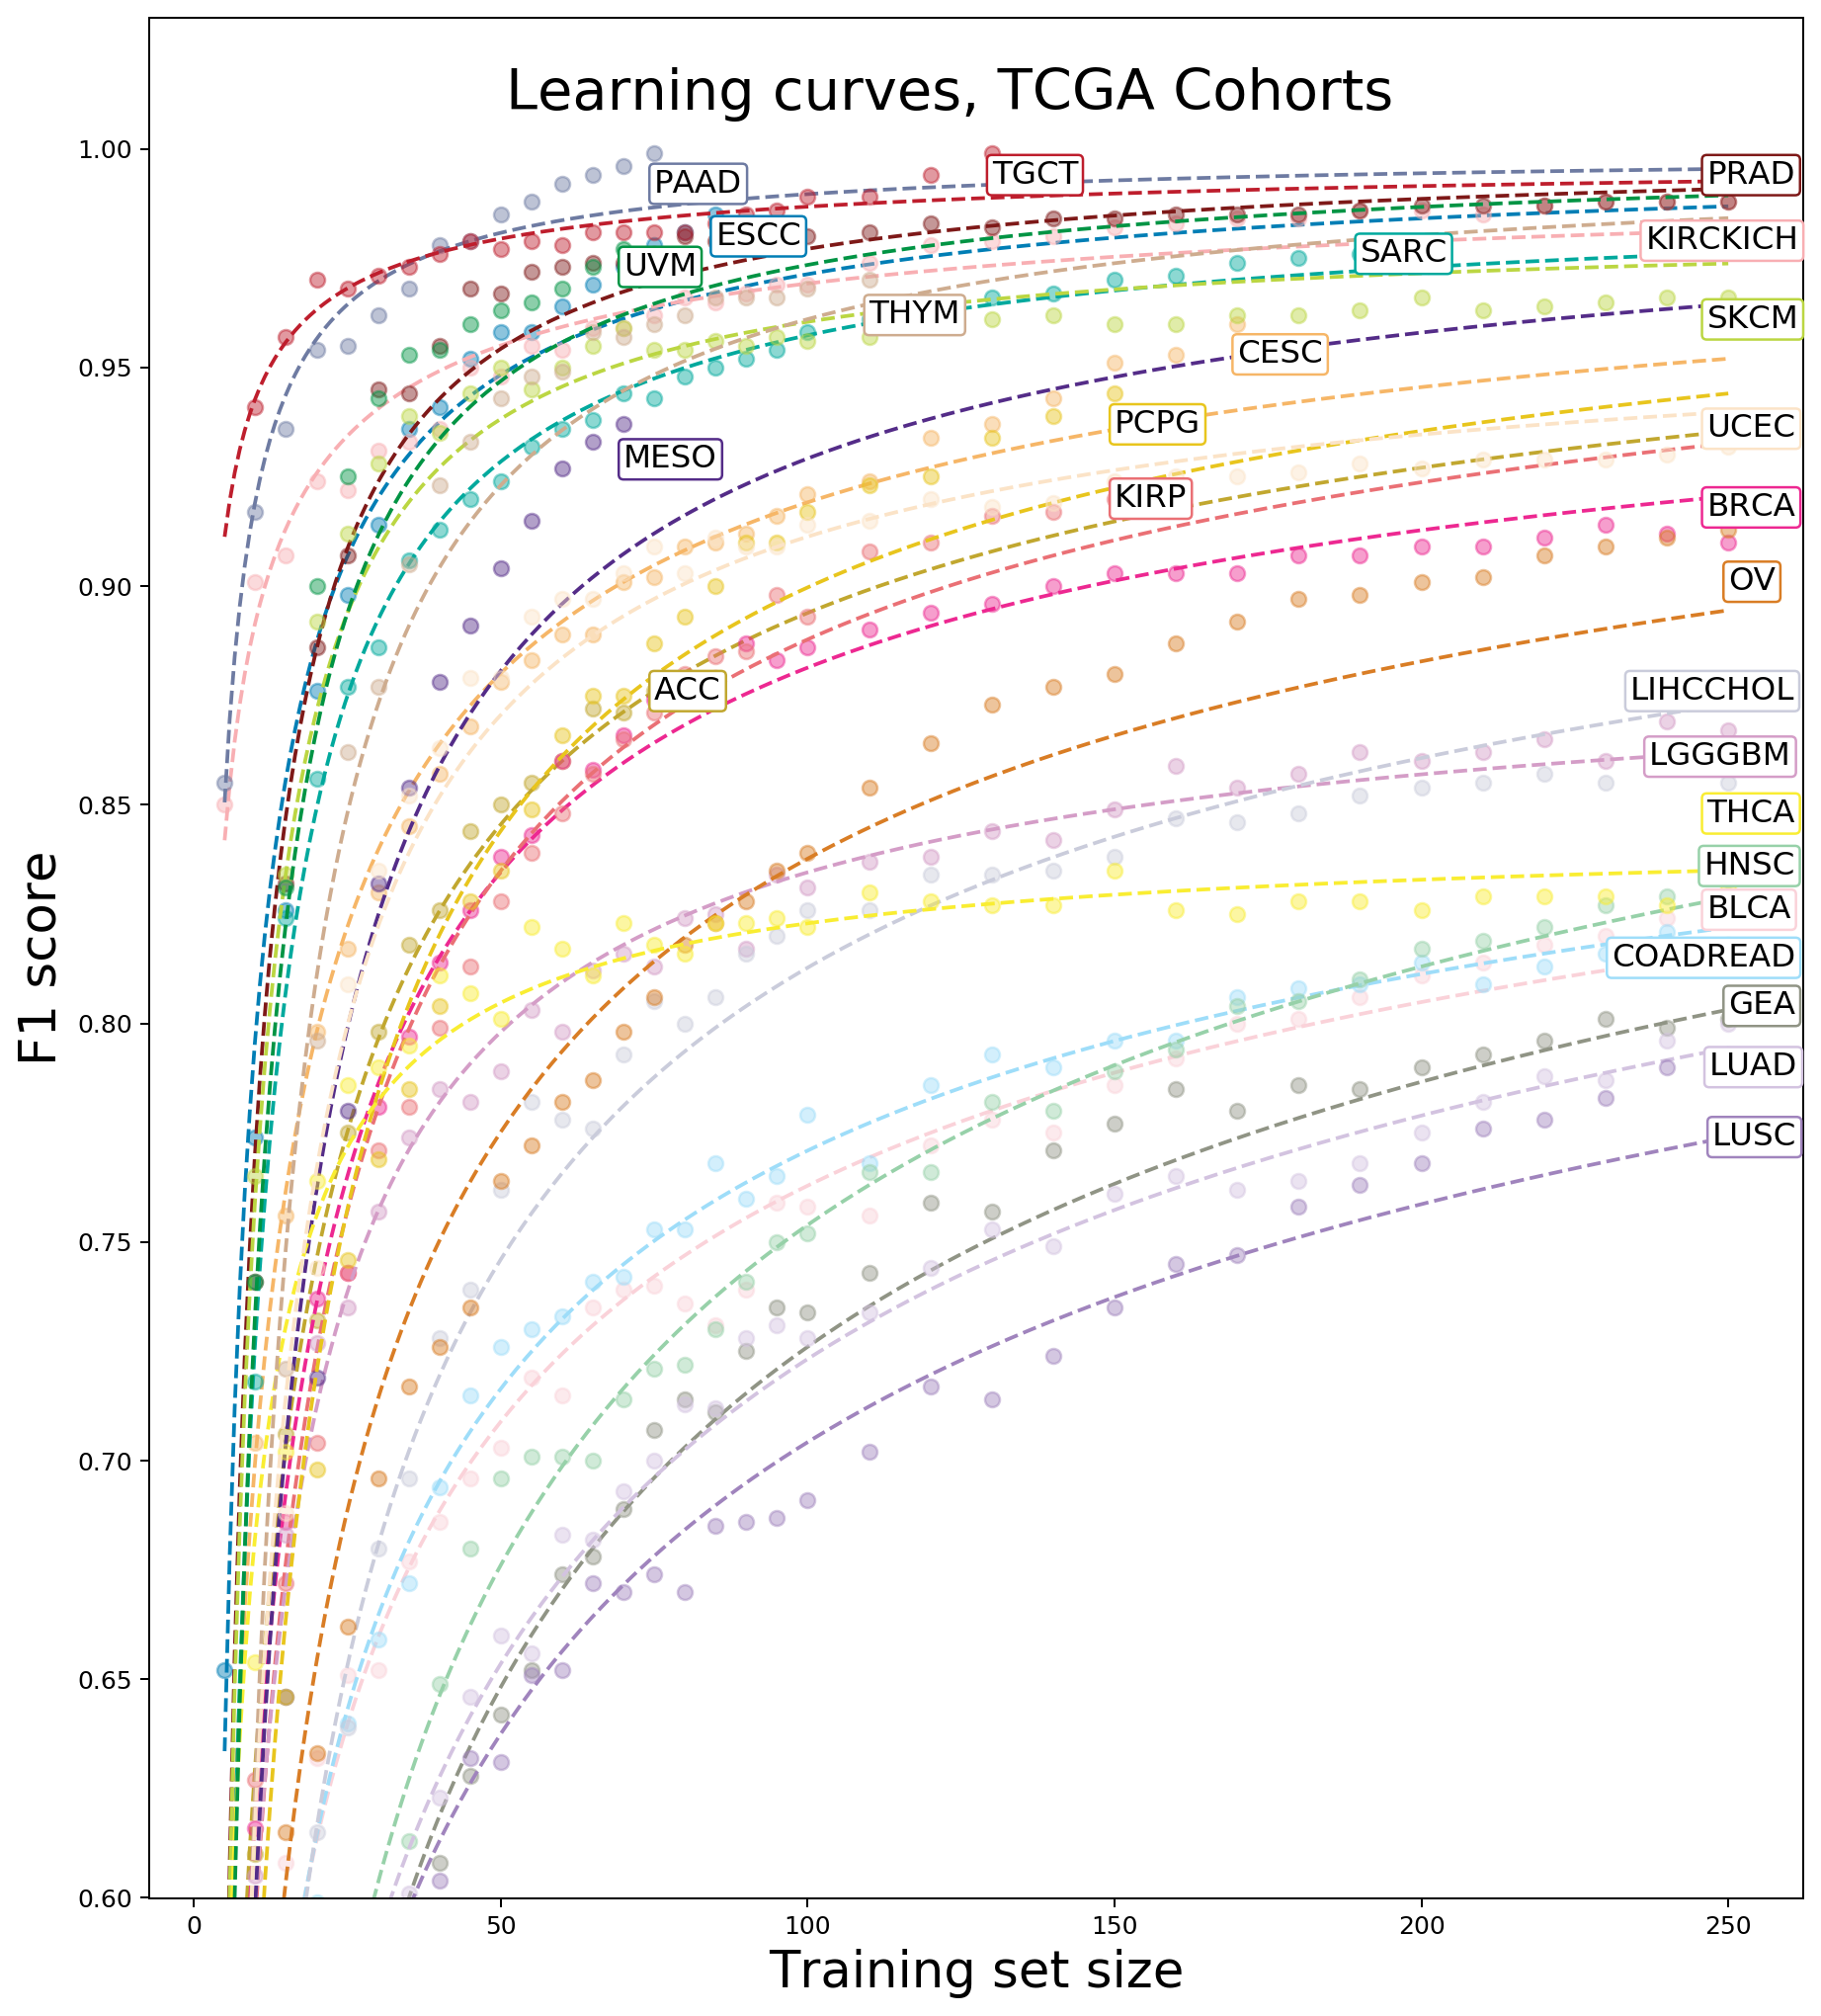

In [7]:
# Panel 7B Main plot, cropped, Labels horizontal
import pandas as pd
import json
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from statistics import mean
colors = pd.read_csv('TCGA_colors_n26_20210228.csv', sep = ',', names = ['Cancer', 'Hexi'])
fig, ax = plt.subplots(figsize = (12,14), dpi = 180)

response_DF = pd.read_csv('sample_response_DF_20210805.tsv', sep = '\t')

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

lower = [0,-1000,-1]
upper = [.5,1000,0]


# To do: reset offsets for cropped version
offset = [0,    # ACC
          -.002,    # BLCA
          .008,    # BRCA
          -.007,    # CESC
          -.003,    # COADREAD
          -.005,    # ESCC
          .003,    # GEA
          .003,    # HNSC
          -.009,    # KIRCKICH
          -.0,    # 
          -.006,      # LGGGBM
          .021,      # LIHCCHOL
          -.01,      # LUAD
          -.019,     # LUSC
          -.008,
          -.012, # OV
          -.007,    # PAAD
          -.007,    # PCPG
          .006, # PRAD
          0,
          -.005, # SKCM
          -.005, # TGCT
          .017,  # THCA
          -.008,
          .004, # UCEC
          -.004 ] # UVM

offset_horz = [0,    # ACC
          -3.5,    # BLCA
          -3.5,    # BRCA
          0,    # 
          -19,    # COADREAD
          0,    # ESCC
          .00,    # GEA
          -4,    # HNSC
          -13.5,    # KIRCKICH
          -.0,    # 
          -12.9,      # LGGGBM
          -16,      # LIHCCHOL
          -3.1,      # LUAD
          -2.6,     # LUSC
          -.00,
          -.0, # OV
          0,
          0,
          -3.5, # PRAD
          0,
          -3.5, # SKCM
          -.00, # TGCT
          -3.5,  # THCA
          -.00,
          -3.5, # UCEC
          0]

for idx, cohort in enumerate(response_DF.Cohort):
#     print(idx)
#     break
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads(
        response_DF.iloc[idx,1]).items()}
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
#     break
    f, _ = curve_fit(Y_acc, full_samples, full_scores, bounds=[lower,upper])
    color_shard = colors[colors.Cancer == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(full_samples, full_scores, 'o', c = colr, alpha = .45)
    ax.text(full_samples[-1] + offset_horz[idx],
            full_scores[-1] + offset[idx],
            cohort, fontsize = 13,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(5, 250, 300)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
fig.suptitle('Learning curves, TCGA Cohorts', y = .86,fontsize = 23)
ax.set_xlabel('Training set size', fontsize = 20.5)
ax.set_ylabel('F1 score', fontsize = 20.5)
plt.ylim(.6,1.03)
plt.savefig('./B/B_main.png',dpi=180)
plt.show()

In [1]:
# Begin plot on single 250 sample cohort and prediction cohort
# Panel 7C, lower left
# Import packages, read files, set bounds and inverse power function

import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.optimize import curve_fit
import numpy as np # need for linspace in plot
from statistics import mean
import statistics
import time
import math
import json
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
pd.options.display.max_rows = 500

In [2]:
colors = pd.read_csv('TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('sample_response_DF_20210805.tsv',
                                          sep = '\t')

lower = [0,-1000,-1]
upper = [.5,1000,0]

def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [11]:
list_of_dists = ['alpha','anglit','arcsine',
                 'beta','betaprime','bradford','burr','burr12',
                 'cauchy','chi','chi2','cosine',
                 'dgamma','dweibull',
                 'expon','exponnorm','exponweib','exponpow',
                 'f','fatiguelife','fisk','foldcauchy','foldnorm',
                 'genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
                 'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l',
                 'halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant',
                 'invgamma','invgauss','invweibull',
                 'johnsonsb','johnsonsu',
                 'kstwobign',
            'ksone', # errors on some cohorts
                 'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax',
                 'maxwell','mielke',
                 'nakagami','ncx2','ncf','nct','norm',
                 'pareto','pearson3','powerlaw','powerlognorm','powernorm',
                 'rdist','reciprocal','rayleigh','rice','recipinvgauss',
                 'semicircular',
                 't','triang','truncexpon','truncnorm','tukeylambda',
                 'uniform',
                 'vonmises','vonmises_line',
                 'wald',
                 'weibull_min','weibull_max',
                 'invweibull']

In [5]:
full_responseX = [('BLCA', 1)]

In [389]:
full_responseX = [('BRCA', 2)] # Toggle on single cohort

In [21]:
full_responseX = [('COADREAD',4)]

In [24]:
full_responseX = [('GEA', 6)]

In [28]:
full_responseX = [('HNSC', 7)]

In [31]:
full_responseX = [('KIRCKICH', 8)]

In [34]:
full_responseX = [('LGGGBM',10)]

In [37]:
full_responseX = [('LIHCCHOL', 11)]

In [40]:
full_responseX = [('LUAD',12)]

In [43]:
full_responseX = [('LUSC', 13)]

In [46]:
full_responseX = [('OV', 15)]

In [49]:
full_responseX = [('PRAD', 18)]

In [52]:
full_responseX = [('SKCM', 20)]

In [55]:
full_responseX = [('THCA', 22)]

In [58]:
full_responseX = [('UCEC', 24)]

In [104]:
full_responseX

[('OV', 15)]

('UCEC', 24)
done


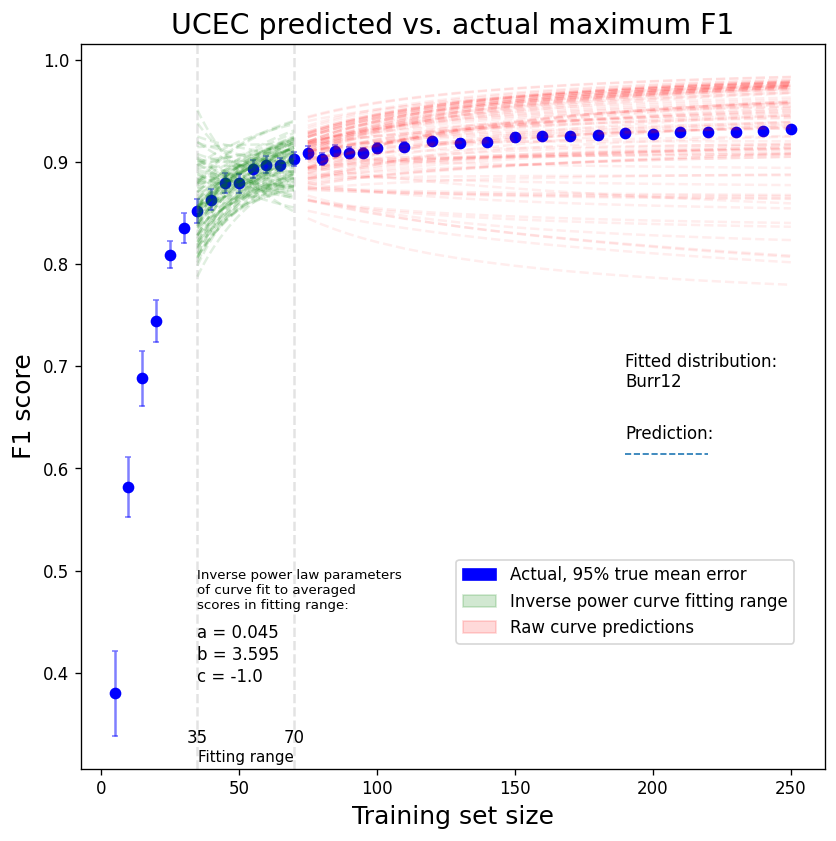

In [59]:
# Full cohorts - plot
full_scores_last = []
fin_val_list = [] # improve data capture
for idx, cohort_tuple in enumerate(full_responseX): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())

    # List of full sample sizes and scores
    full_samples = []
    full_scores = [] # target object for comparison
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
    full_scores_last.append( ( cohort, full_scores[-1] ) ) #    <-----   Important

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [] # * Using this
    for j in list(range(sample_max,len(accuracy_response))):
        prediction_samples.append(accuracy_response[j][0])

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])
    
    n1 = 100
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
 
        CI_range.append(z * (s/math.sqrt(n1)))
    # Errorbars for sampling error, Keep, bring to top
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
#     slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    y_final_100 = []
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # Fit to each param set
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])

    # Label plot, keep
    plt.title(cohort +
        ' predicted vs. actual maximum F1',
        fontsize = 17)
    ax.set_xlabel('Training set size', fontsize = 15)
    ax.set_ylabel('F1 score', fontsize = 15)
    
    # Tune placement of labels, keep
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]              # Y range, defined from limits
    
    # Fitting range labels
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    
    # Add vertical dashes for fitting window, keep
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error') # delete
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    plt.legend(handles=[patch_1, patch_2, patch_3], bbox_to_anchor=(.97,
                                                                    .3))
    
    # Plot parameters
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))
    
    plt.text(190, ylims[0]+y_rng/1.9, 'Fitted distribution:\nBurr12')
    plt.text(190, ylims[0]+y_rng/2.2, 'Prediction:')
    xd = [190,220]
    ydiv = 2.3
    yd = [ylims[0]+y_rng/ydiv, ylims[0]+y_rng/ydiv]
    plt.plot(xd,yd,'--',linewidth = 1)
    
    # Save figure, keep
    plt.savefig('./version_7/'+ cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode
    
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)
    stor_tup = (cohort, final_vals)
    fin_val_list.append(stor_tup)  # Keep!    ******************************
print('done')

In [ ]:
# auto zone

In [125]:
full_response = [('BLCA', 1),
 ('BRCA', 2), # 1
 ('COADREAD', 4), # 2
 ('GEA', 6),
 ('HNSC', 7),
 ('KIRCKICH', 8),
 ('LGGGBM', 10), # 6
 ('LIHCCHOL', 11),
 ('LUAD', 12), # 8
 ('LUSC', 13),
 ('OV', 15),
 ('PRAD', 18),
 ('SKCM', 20),
 ('THCA', 22),
 ('UCEC', 24)]

In [165]:
# Full cohorts - auto
full_scores_last = []
fin_val_list = [] # improve data capture
for idx, cohort_tuple in enumerate(full_response): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())

    # List of full sample sizes and scores
    full_samples = []
    full_scores = [] # last value is target object for comparison
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])
    full_scores_last.append( ( cohort, full_scores[-1] ) ) #    <-----   Important
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [] # * Using this
    for j in list(range(sample_max,len(accuracy_response))):
        prediction_samples.append(accuracy_response[j][0])

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])

    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    y_final_100 = []
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # Fit to each param set
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict
        y_final_100.append(y_predict[-1])
    
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)
    stor_tup = (cohort, final_vals)
    fin_val_list.append(stor_tup)  # Keep!    ******************************
        
print('done')

('BLCA', 1)
('BRCA', 2)
('COADREAD', 4)
('GEA', 6)
('HNSC', 7)
('KIRCKICH', 8)
('LGGGBM', 10)
('LIHCCHOL', 11)
('LUAD', 12)
('LUSC', 13)
('OV', 15)
('PRAD', 18)
('SKCM', 20)
('THCA', 22)
('UCEC', 24)
done


In [166]:
full_scores_last

[('BLCA', 0.828),
 ('BRCA', 0.91),
 ('COADREAD', 0.818),
 ('GEA', 0.801),
 ('HNSC', 0.833),
 ('KIRCKICH', 0.988),
 ('LGGGBM', 0.867),
 ('LIHCCHOL', 0.855),
 ('LUAD', 0.8),
 ('LUSC', 0.793),
 ('OV', 0.913),
 ('PRAD', 0.988),
 ('SKCM', 0.966),
 ('THCA', 0.831),
 ('UCEC', 0.932)]

In [167]:
len(fin_val_list) # run each dist type on this list cohorts

15

In [ ]:
# end auto zone

In [7]:
len(fin_val_list)

1

In [10]:
list_of_dists = [
    'burr12'
]

In [11]:
results_list = []
for j in fin_val_list:
    cohort = j[0]
    print(cohort)
    final_vals = j[1]
    
    results = []
    for i in list_of_dists: # replace
        dist = getattr(stats, i)
        param = dist.fit(final_vals)
        a = stats.kstest(final_vals, i, args=param)
        results.append(( i, a[0], a[1] ))
        results.sort(key=lambda x:float(x[2]), reverse=True)
    results_list.append((cohort, results))

BLCA


/Users/karlberb/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [132]:
for i in list_of_dists: # replace
    dist = getattr(stats, i)
    print(dist)
    a, b = dist.fit(final_vals, floc=0, fscale=1)[:2]
    print("a =", a, "  b =", b)
#     break

a = -3.9977341647246707   b = 1.3898935894373872
a = 30.801954068202374   b = 2.183808645300895


In [156]:
list_of_dists = [
    'beta'
]

UCEC
burr12
0.00026602960612074424
 


/Users/karlberb/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


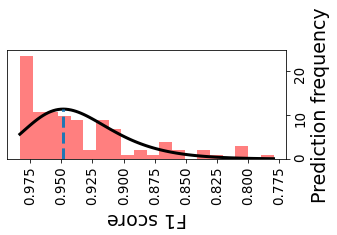

In [60]:
for i in list_of_dists:
    dist = getattr(stats, i)
    
    dist_list = []
    cohort_list = []

    raw_mean_list = []
    raw_median_list = []
    
    peak_val_list = []
    actual_val_list = []

    for j, fin_tup in enumerate(fin_val_list): # for each cohort

        final_vals = fin_tup[1]

        cohort = fin_tup[0]
        print(cohort)
        distri = i

        fig = plt.figure(figsize=(5, 2))
        ax = plt.subplot(111)

        a, b = dist.fit(final_vals, floc=0, fscale=1)[:2] # <----- original fit
        ax.plot(np.linspace(min(final_vals), max(final_vals), 100),
                            dist.pdf(np.linspace(min(final_vals), max(final_vals), 100),
                                           a, b), 'k', linewidth = 3)

#         mean_n, var_n, skew_n, kurt_n = dist.stats(a, b, moments='mvsk') # <----- original

        mxlst = list(dist.pdf(np.linspace(min(final_vals), max(final_vals), 100), a, b))

        y_hist, x_hist, _ = ax.hist(final_vals, alpha=0.5, color='red', bins=20, density=True)

        mxv = max(mxlst)
        x_ndx = mxlst.index(mxv)
        xlst = np.linspace(min(final_vals), max(final_vals), 100)

        xd = [xlst[x_ndx],xlst[x_ndx]]
        yd = [0, mxv]
        plt.plot(xd,yd,'--',linewidth = 3)

        ax.invert_xaxis()
        
        plt.xticks(rotation = 90, size=13.5)
        plt.ylabel('Prediction frequency', size = 19)
        plt.xlabel('F1 score', size = 19, rotation = 180)
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        plt.yticks(rotation = 90, size=13.5)
        plt.locator_params(axis='y', nbins=3) # ACC

        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(0.6)
        
        ax.patch.set_facecolor('white')
        ax.patch.set_alpha(0.7)
        
        plt.savefig('./version_7/'+cohort+'_'+distri+'_distr_trnslc2.png',
                    facecolor=fig.get_facecolor(), edgecolor='none',
                    bbox_inches = 'tight')
        
        dist_list.append(distri)
        cohort_list.append(cohort)

        raw_mean_list.append(mean(final_vals))
        raw_median_list.append(statistics.median(final_vals))
        
        peak_val_list.append(xlst[x_ndx])
        actual_val_list.append(full_scores_last[j][1])
        
    stor_dict = {
        'Dist': dist_list,
        'Cohort': cohort_list,

        'Raw_mean': raw_mean_list,
        'Raw_median': raw_median_list,

        'Peak_val': peak_val_list,
        'Actl_val': actual_val_list, 
    }
        
    storDF = pd.DataFrame( stor_dict )
    print(distri)
    print(mean_squared_error(storDF.Actl_val, storDF.Peak_val))
    print(' ') # powerlognorm: .0005, nct is .0007, beta: .0004, johnsons: .0006? burr12: .0002

In [369]:
mean_squared_error(storDF.Actl_val, storDF.Raw_mean)

0.0006238506150444631

In [372]:
storDF

,Dist,Cohort,Raw_mean,Raw_median,Peak_val,Actl_val
0,burr12,BLCA,0.789858,0.799064,0.815021,0.828
1,burr12,BRCA,0.915475,0.920527,0.929946,0.910
2,burr12,COADREAD,0.801763,0.813642,0.825816,0.818
3,burr12,GEA,0.781787,0.779870,0.807562,0.801
4,burr12,HNSC,0.796068,0.792060,0.818810,0.833
5,burr12,KIRCKICH,0.967704,0.983807,0.976049,0.988
6,burr12,LGGGBM,0.844113,0.855475,0.864947,0.867
7,burr12,LIHCCHOL,0.861029,0.871077,0.884068,0.855
8,burr12,LUAD,0.774005,0.773934,0.797590,0.800
9,burr12,LUSC,0.745994,0.743940,0.773330,0.793


In [3]:
full_responseX = [('ACC',0)]

('ACC', 0)
done


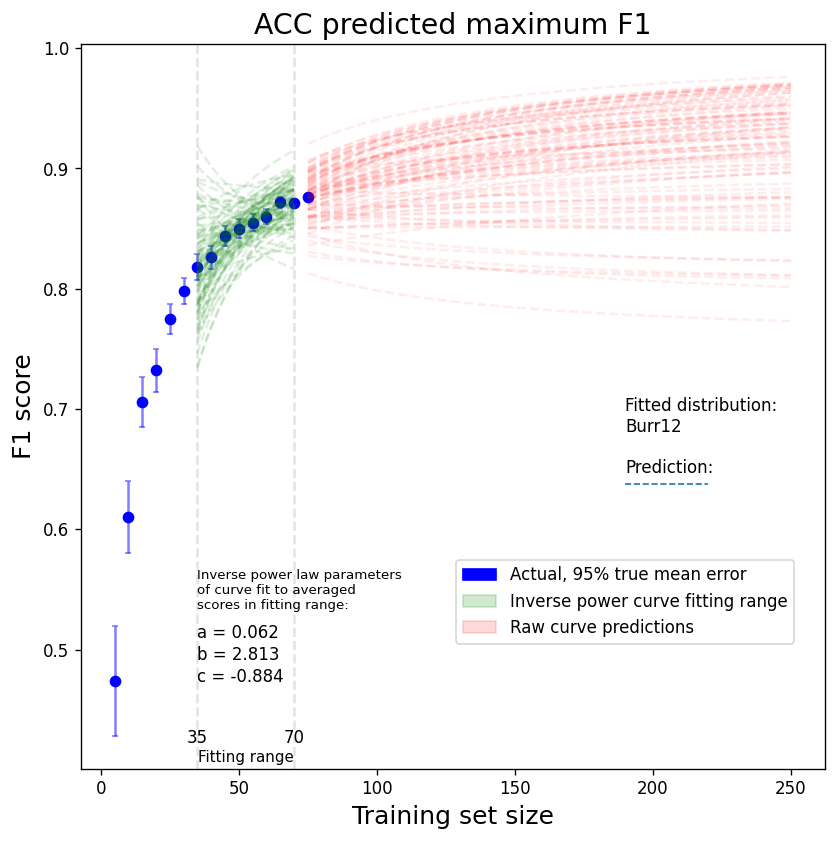

In [4]:
# New predict
fin_val_list = []
for idx, cohort_tuple in enumerate(full_responseX): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())

    # List of full sample sizes and scores
    full_samples = []
    full_scores = [] # target object for comparison
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [75,80,85,90,95,100,               # hard code for under-fit cohorts, last working version, v3
                     110,120,130,140,150,160,170,180,
                     190,200,210,220,230,240,250]

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])
    
    n1 = 100
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
 
        CI_range.append(z * (s/math.sqrt(n1)))
    # Errorbars for sampling error, Keep, bring to top
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
#     slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    y_final_100 = []
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # Fit to each param set
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])

    # Label plot, keep
    plt.title(cohort +
        ' predicted maximum F1',
        fontsize = 17)
    ax.set_xlabel('Training set size', fontsize = 15)
    ax.set_ylabel('F1 score', fontsize = 15)
    
    # Tune placement of labels, keep
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]              # Y range, defined from limits
    
    # Fitting range labels
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    
    # Add vertical dashes for fitting window, keep
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error') # delete
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    plt.legend(handles=[patch_1, patch_2, patch_3], bbox_to_anchor=(.97,
                                                                    .3))
    
    # Plot parameters
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))
    
    plt.text(190, ylims[0]+y_rng/2.15, 'Fitted distribution:\nBurr12')
    plt.text(190, ylims[0]+y_rng/2.45, 'Prediction:')
    xd = [190,220]
    ydiv = 2.55
    yd = [ylims[0]+y_rng/ydiv, ylims[0]+y_rng/ydiv]
    plt.plot(xd,yd,'--',linewidth = 1)
    
    # Save figure, keep
    plt.savefig('./version_7/'+ cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode
    
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)
    stor_tup = (cohort, final_vals)
    fin_val_list.append(stor_tup)  # Keep!    ******************************
print('done')

/Users/karlberb/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


burr12
0.011037615181263153
 


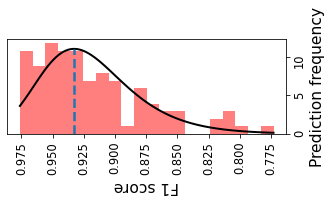

In [421]:
# ACC
for i in list_of_dists:
    dist = getattr(stats, i)
    
    dist_list = []
    cohort_list = []

    raw_mean_list = []
    raw_median_list = []
    
    peak_val_list = []
    actual_val_list = []

    for j, fin_tup in enumerate(fin_val_list): # for each cohort

        final_vals = fin_tup[1]

        cohort = fin_tup[0]

        distri = i

        fig = plt.figure(figsize=(5, 1.75))
        ax = plt.subplot(111)

        a, b = dist.fit(final_vals, floc=0, fscale=1)[:2] # <----- original fit
        ax.plot(np.linspace(min(final_vals), max(final_vals), 100),
                            dist.pdf(np.linspace(min(final_vals), max(final_vals), 100),
                                           a, b), 'k', linewidth = 2)

#         mean_n, var_n, skew_n, kurt_n = dist.stats(a, b, moments='mvsk') # <----- original

        mxlst = list(dist.pdf(np.linspace(min(final_vals), max(final_vals), 100), a, b))

        y_hist, x_hist, _ = ax.hist(final_vals, alpha=0.5, color='red', bins=20, density=True)

        mxv = max(mxlst)
        x_ndx = mxlst.index(mxv)
        xlst = np.linspace(min(final_vals), max(final_vals), 100)

        xd = [xlst[x_ndx],xlst[x_ndx]]
        yd = [0, mxv]
        plt.plot(xd,yd,'--',linewidth = 2.5)

        ax.invert_xaxis()
        
        plt.xticks(rotation = 90, size=11.5)
        plt.ylabel('Prediction frequency', size = 15.5)
        plt.xlabel('F1 score', size = 15.5, rotation = 180)
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        plt.yticks(rotation = 90, size=11.5)
        plt.locator_params(axis='y', nbins=3) # ACC

        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(0.6)
        
        ax.patch.set_facecolor('white')
        ax.patch.set_alpha(0.7)
        
        plt.savefig('./version_6/'+cohort+'_'+distri+'_distr_trnslc2.png',
                    facecolor=fig.get_facecolor(), edgecolor='none',
                    bbox_inches = 'tight')
        
        dist_list.append(distri)
        cohort_list.append(cohort)

        raw_mean_list.append(mean(final_vals))
        raw_median_list.append(statistics.median(final_vals))
        
        peak_val_list.append(xlst[x_ndx])
        actual_val_list.append(full_scores_last[j][1])
        
    stor_dict = {
        'Dist': dist_list,
        'Cohort': cohort_list,

        'Raw_mean': raw_mean_list,
        'Raw_median': raw_median_list,

        'Peak_val': peak_val_list,
        'Actl_val': actual_val_list, 
    }
        
    storDF = pd.DataFrame( stor_dict )
    print(distri)
    print(mean_squared_error(storDF.Actl_val, storDF.Peak_val))
    print(' ') # powerlognorm: .0005, nct is .0007, beta: .0004, johnsons: .0006? burr12: .0002

In [ ]:
# Old notes

In [157]:
# Original core functionality experiment
for i in list_of_dists: # replace
    dist = getattr(stats, i)
    print(dist)
    a, b = dist.fit(final_vals, floc=0, fscale=1)[:2]
    final_vals = fin_val_list[0][1]
    a, b = stats.beta.fit(final_vals, floc=0, fscale=1)[:2]
    print("a =", a, "  b =", b)

a = 14.108581352114866   b = 3.756806778941443


UCEC
johnsonsu
a = 14.108581352114866   b = 3.756806778941443
skew =  -0.6217696458394203  kurtosis = 0.2645464260457981
mean = 0.7897159159721363   var = 0.008802611792494712
peak x val = 0.8271163894907895
raw mean = 
F1 final score, actual 0.932


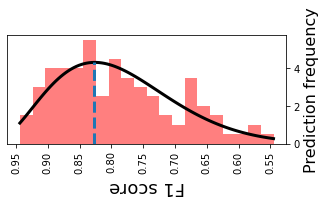

In [375]:
# Beta cell
cohort = results_list[0][0]
print(cohort)

final_vals = fin_val_list[0][1]
distri = results_list[0][1][4][0]
print(distri)

fig = plt.figure(figsize=(5, 2))
ax = plt.subplot(111)

a, b = stats.beta.fit(final_vals, floc=0, fscale=1)[:2]
ax.plot(np.linspace(min(final_vals), max(final_vals), 100),
                    stats.beta.pdf(np.linspace(min(final_vals), max(final_vals), 100),
                                   a, b), 'k', linewidth = 3)

mean_n, var_n, skew_n, kurt_n = stats.beta.stats(a, b, moments='mvsk')

mxlst = list(stats.beta.pdf(np.linspace(min(final_vals), max(final_vals), 100), a, b))

y_hist, x_hist, _ = ax.hist(final_vals, alpha=0.5, color='red', bins=20, density=True)

mxv = max(mxlst)
x_ndx = mxlst.index(mxv)
xlst = np.linspace(min(final_vals), max(final_vals), 100)
# plt.scatter(xlst[x_ndx], y_hist.max() / (y_hist.max()*4), s = 110, color = 'black')

xd = [xlst[x_ndx],xlst[x_ndx]]
yd = [0, mxv]
plt.plot(xd,yd,'--',linewidth = 3)

ax.invert_xaxis()
plt.yticks(rotation = 90)
plt.xticks(rotation = 90)
plt.ylabel('Prediction frequency', size = 16)
plt.xlabel('F1 score', size = 18, rotation = 180)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.savefig('./version_4/'+cohort+'_'+distri+'_distr_trns.png',
            transparent = True, bbox_inches = 'tight')

print("a =", a, "  b =", b)
print('skew = ', skew_n, ' kurtosis =', kurt_n)
print("mean =", mean_n, "  var =", var_n)
print('peak x val =', xlst[x_ndx])
print('raw mean = ')
print('F1 final score, actual', full_scores[-1])

In [48]:
johnsonsb_list = []

BLCA
johnsonsb
a = -2.357826939468333   b = 1.65311466016403
mean = 0.7901548529495517   var = 0.009400641481321137
skew =  -0.8935403558350457  kurtosis = 0.8739919963324376
peak x val = 0.8432430184879074
Kolomogorov-Smirnov critical value, 95% confidence = 0.136
F1 final score, actual 0.828


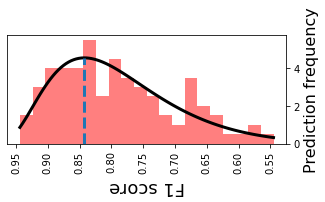

In [52]:
# johnsonsb cell
cohort = results_list[0][0]
print(cohort)

final_vals = fin_val_list[0][1]
distri = results_list[0][1][3][0]
print(distri)

fig = plt.figure(figsize=(5, 2))
ax = plt.subplot(111)

a, b = stats.johnsonsb.fit(final_vals, floc=0, fscale=1)[:2]
ax.plot(np.linspace(min(final_vals), max(final_vals), 100),
                    stats.johnsonsb.pdf(np.linspace(min(final_vals), max(final_vals), 100),
                                        a, b), 'k', linewidth = 3)

mean_n, var_n, skew_n, kurt_n = stats.johnsonsb.stats(a, b, moments='mvsk')

mxlst = list(stats.johnsonsb.pdf(np.linspace(min(final_vals), max(final_vals), 100), a, b))

y_hist, x_hist, _ = ax.hist(final_vals, alpha=0.5, color='red', bins=20, density=True)

mxv = max(mxlst)
x_ndx = mxlst.index(mxv)
xlst = np.linspace(min(final_vals), max(final_vals), 100)
# plt.scatter(xlst[x_ndx], y_hist.max() / (y_hist.max()*4), s = 110, color = 'black')

xd = [xlst[x_ndx],xlst[x_ndx]]
yd = [0, mxv]
plt.plot(xd,yd,'--',linewidth = 3)

ax.invert_xaxis()
plt.yticks(rotation = 90)
plt.xticks(rotation = 90)
plt.ylabel('Prediction frequency', size = 16)
plt.xlabel('F1 score', size = 18, rotation = 180)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.savefig('./version_4/'+cohort+'_'+distri+'_distr_trns.png', transparent = True)

print("a =", a, "  b =", b)
print("mean =", mean_n, "  var =", var_n)
print('skew = ', skew_n, ' kurtosis =', kurt_n)
print('peak x val =', xlst[x_ndx])
print('Kolomogorov-Smirnov critical value, 95% confidence =', 1.36/((100)**(0.5)))
# print('Kolomogorov-Smirnov test statistic =', results_list[0][1][4][1])
print('F1 final score, actual', full_scores[-1])

In [ ]:
# to do
# fade the histo
# make line bigger


In [ ]:
# plt.scatter(mean_n, y_hist.max() / (y_hist.max()*4), s = 110, color = 'black')

# ax.annotate('Mean', (mean_n, y_hist.max() / (y_hist.max()*1.3)), rotation = 90, ha = 'center', va = 'bottom')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.7)

ax = fig.add_subplot(111)

ax.plot(range(10))

ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)

# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

In [ ]:
# Partial cohorts

In [155]:
full_responseX = [('ACC',0)]

In [151]:
partial_response_predict = [('ACC', 0),
                        ('CESC', 3),
                        ('ESCC', 5),
                        ('KIRP', 9),
                        ('MESO', 14),
                        ('PAAD', 16),
                        ('PCPG', 17),
                        ('SARC', 19),
                        ('TGCT', 21),
                        ('THYM', 23),
                        ('UVM', 25),]

In [ ]:
# Partial cohorts, template from above

for idx, cohort_tuple in enumerate(full_responseX): # list of cohorts and indices <--- TOGGLE object, COAD, LUAD
    
    print(cohort_tuple)
    cohort = cohort_tuple[0]
    cohort_index = cohort_tuple[1]

    accuracy_response_dct = {
    int(k):[i for i in v] for k,v in json.loads(
        sample_response_DF.iloc[cohort_index,1]).items()} # sample_response_DF_20210805.tsv
    
    accuracy_response = sorted(accuracy_response_dct.items())
    
    # List of full sample sizes and scores
    full_samples = []
    full_scores = []
    for i in list(range(0,len(accuracy_response))):
        score = mean(accuracy_response[i][1])
        mean_temp = round(score, 3)
        full_scores.append(mean_temp)
        full_samples.append(accuracy_response[i][0])

    # Plot learning curve
    fig, ax = plt.subplots(figsize = (8,8), dpi = 120)
    ax.scatter(full_samples, full_scores, color = 'blue')
    
    # Set fitting region by index
    if cohort not in ['COADREAD', 'HNSC']:
        sample_max = 14 #14 is default, max
        sample_min = 6 #5 is default # BRCA 14,4 and 13,4 is good, 14,7 too
    else:
        sample_max = 13 # 13 is default, max
        sample_min = 5  # 4 is dfault      

    fitting_samples = []
    fitting_scores = []
    fitting_scores_ave = []
    for i in list(range(sample_min, sample_max)):
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this step
        fitting_scores_ave.append(mean(score_block))

    actual_scores = []
    prediction_samples = [75,80,85,90,95,100,               # hard code for under-fit cohorts, last working version, v3
                     110,120,130,140,150,160,170,180,
                     190,200,210,220,230,240,250]

    actual_full_scores = []
    for j in list(range(0,len(accuracy_response))):
        actual_full_scores.append(accuracy_response[j][1])
    
    n1 = 100
    CI_range = []
    for k, score_set in enumerate(actual_full_scores):
#         xbar = round(mean(score_set), 3) # yes
        z = 1.96 # 95%
        s = statistics.stdev(score_set) # Yes, all the scores corresponding to this step
        CI_range.append(z * (s/math.sqrt(n1)))
    # Errorbars for sampling error, Keep, bring to top
    ax.errorbar(full_samples,
                full_scores,
                yerr = CI_range, color = 'blue', alpha = .5, fmt=' ',
                capsize = 2)
    
    slope = ()
    front_end_mean_params, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 fitting_scores_ave,
                                    bounds=[lower,upper])
    x_fit_slope = np.linspace(fitting_samples[0], fitting_samples[-1], len(fitting_samples))
    y_fit_slope = Y_acc(x_fit_slope, *front_end_mean_params)
#     ax.scatter(x_fit_slope, y_fit_slope, s=60, facecolors='none', edgecolors='black')
    
    parameter_dict[cohort_index] = front_end_mean_params # add to parameter dict
    
    slope_ave = (y_fit_slope[-1] - y_fit_slope[0])/(x_fit_slope[-1] - x_fit_slope[0])
    slope_list.append(slope_ave)
    
    intercept_ave = y_fit_slope[0] - slope_ave * x_fit_slope[0]
    intercept_list.append(intercept_ave)
    
    # Grey dot projection, based on average curve
    project = Y_acc(prediction_samples, *front_end_mean_params)
#    ax.scatter(prediction_samples, project, s=50, facecolors='none', edgecolors='grey') ## <--- Grey dots off
    
    # Grey dot confidence interval - only one sample for n
    grey_up = []
    grey_low = []
    n=1

    # Set up for prediction              *********************** 100 resamplings, build orange bar
    front_end_parameters = {}
    y_predictions = []         #                             <---------- y_predictions
    y_predictions_srs = pd.Series(dtype = 'float64')
    y_std = []
    slopes_100 = []
    intercepts_100 = []
    y_final_100 = []
    orange_vs_grey = []
    down_curves = []
    down_curves_srs = pd.Series(dtype = 'float64')
    for resampling_idx in list(range(0,100)):

        scores_temp = [] # 100 scores for each sample size on restricted front-end portion of curve

        for tuple_n in accuracy_response[sample_min:sample_max]:
            scores_temp.append(tuple_n[1][resampling_idx])

        front_end_param_set_n, _ = curve_fit(Y_acc,
                                 fitting_samples,
                                 scores_temp,
                                    bounds=[lower,upper])
        front_end_parameters[resampling_idx] = front_end_param_set_n

        # Now, plot all 100 front-end fitting curves and compare to actual 
        x_fit = np.linspace(fitting_samples[0], fitting_samples[-1], 50)
        y_fit = Y_acc(x_fit, *front_end_param_set_n)
        ax.plot(x_fit, y_fit, '--', color = 'green', alpha = .12)
        
        slope = (y_fit[-1] - y_fit[0])/(x_fit[-1] - x_fit[0])
        slopes_100.append(slope)
        intercept = y_fit[0] - slope * x_fit[0]
        intercepts_100.append(intercept)
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n) # DEBUG trace back
        ax.plot(prediction_samples, y_predict, '--', color = 'red', alpha = .07)
        y_predictions.append(y_predict)
        
        y_predictions_srs[str(resampling_idx)] = y_predict

        y_final_100.append(y_predict[-1])
        
        diff = y_predict[0]-y_predict[-1]
        down_curves.append(diff)
    
    slopeDF_100 = pd.DataFrame()
    slopeDF_100['Intercept'] = intercepts_100
    slopeDF_100['Slope'] = slopes_100

    # Label plot, keep
    plt.title(cohort +
        ' predicted maximum F1',
        fontsize = 17)
    ax.set_xlabel('Training set size', fontsize = 15)
    ax.set_ylabel('F1 score', fontsize = 15)
    
    # Tune placement of labels, keep
    xfit1 = fitting_samples[0]
    xfit2 = fitting_samples[-1]
    ylims = ax.get_ylim()
    y_rng = ylims[1] - ylims[0]              # Y range, defined from limits
    
    # Fitting range labels
    plt.text(xfit1, ylims[0]+.035 * y_rng,
             str(xfit1), ha = 'center')    
    plt.text((xfit1+xfit2)/2, ylims[0]+.01 * y_rng,
             'Fitting range', ha = 'center', fontsize = 9)
    plt.text(xfit2, ylims[0]+.035 * y_rng,
             str(xfit2), ha = 'center')
    
    # Add vertical dashes for fitting window, keep
    ax.add_artist(lines.Line2D([xfit1, xfit1],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    ax.add_artist(lines.Line2D([xfit2, xfit2],
                              [ylims[0], ylims[1]],
                              color = 'grey', linestyle='dashed', alpha = .22))
    
    patch_1 = mpatches.Patch(color='blue', label='Actual, 95% true mean error') # delete
    patch_2 = mpatches.Patch(color='green', alpha = .18, label='Inverse power curve fitting range')
    patch_3 = mpatches.Patch(color='red', alpha = .15, label='Raw curve predictions')
    plt.legend(handles=[patch_1, patch_2, patch_3], loc = 4)
    
    # Plot parameters
    plt.text(xfit1, ylims[0]+.22 * y_rng, 'Inverse power law parameters\nof curve fit to averaged\nscores in fitting range:',
            fontsize = 8)
    plt.text(xfit1, ylims[0]+.18 * y_rng, 'a = '+str(round(front_end_mean_params[0],3)))
    plt.text(xfit1, ylims[0]+.15 * y_rng, 'b = '+str(round(front_end_mean_params[1],3)))         
    plt.text(xfit1, ylims[0]+.12 * y_rng, 'c = '+str(round(front_end_mean_params[2],3)))

    # Save figure, keep
    plt.savefig('./D/'+ cohort + '.'+
                str(fitting_samples[0])+'.'+
                str(fitting_samples[-1])+
                '.png') # end devel mode
    
    # Density of partial cohort
    final_vals = []
    for i in y_predictions:
        final_val = i[-1]
        final_vals.append(final_val)

    fig, ax = plt.subplots()
    ax.hist(final_vals, bins=15, density=True, alpha=0.5,
             histtype='stepfilled', color='indianred',
             edgecolor='none')

    plt.xticks([])
    plt.yticks([])
    ax.invert_xaxis()

    # plt.text(.9, 1, cohort + ' prediction density', rotation = 90, size = 14)
    fig.text(.07, .15, 'Prediction density', rotation = 90, size = 26)
    plt.savefig('./D/'+cohort+'_size_distr.png')

print('done')